<a href="https://colab.research.google.com/github/thanhduc206/-AI---Fuzzy-logic/blob/main/ANNhw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
!fusermount -u /content/drive
drive.mount('/content/drive')


Mounted at /content/drive


In [32]:
!pip install tensorflow keras matplotlib numpy


In [33]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [34]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

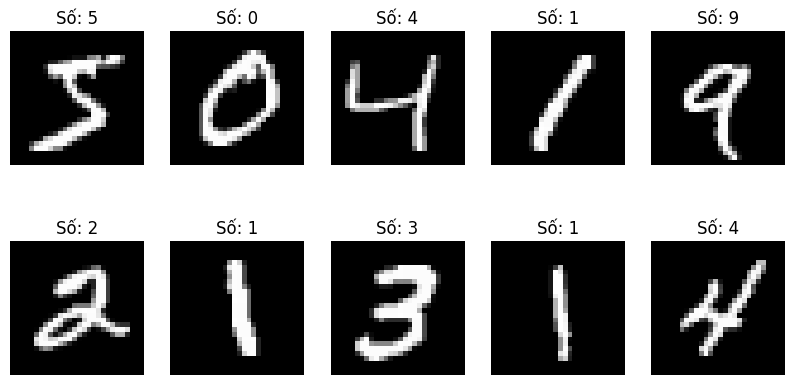

In [35]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_mnist[i], cmap='gray')
    plt.title(f"Số: {y_train_mnist[i]}")
    plt.axis('off')
plt.show()

In [36]:
x_train_mnist = x_train_mnist.reshape(-1, 28*28).astype('float32') / 255
x_test_mnist = x_test_mnist.reshape(-1, 28*28).astype('float32') / 255


In [37]:
y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

def build_ann_model(input_size, num_classes):
    model = Sequential()

    model.add(Dense(512, activation='relu', input_shape=(input_size,)))
    model.add(Dropout(0.5))


    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))


    model.add(Dense(128, activation='relu'))


    model.add(Dense(num_classes, activation='softmax'))


    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [39]:
model_mnist = build_ann_model(28*28, 10)

In [40]:
history_mnist = model_mnist.fit(x_train_mnist, y_train_mnist, epochs=10, batch_size=64, validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8234 - loss: 0.5629 - val_accuracy: 0.9616 - val_loss: 0.1217
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9467 - loss: 0.1742 - val_accuracy: 0.9711 - val_loss: 0.0953
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9591 - loss: 0.1343 - val_accuracy: 0.9733 - val_loss: 0.0871
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9663 - loss: 0.1137 - val_accuracy: 0.9766 - val_loss: 0.0777
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9670 - loss: 0.1080 - val_accuracy: 0.9793 - val_loss: 0.0700
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9713 - loss: 0.0905 - val_accuracy: 0.9809 - val_loss: 0.0719
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9728 - loss: 0.0870 - val_accuracy: 0.9804 - val_loss: 0.0620
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9760 - loss: 0.0792 - 

In [41]:
!ls /content/drive/MyDrive/mnist


digit-12-matlab-grayscale.png
DJd6L.png
rYiL6.png
z6413437876308_bca4be1dccea9fe8e217453e9437657e.jpg
z6413437878498_d1a5b741a32701be8a999f4102e98593.jpg
z6413437879201_ed0e2d8a426efe1399c962d0ee598e4d.jpg
z6413437879323_73e3940fcedb3334d1c6cd45ed9b1f19.jpg
z6413437879779_aab13aaa324621035bc6d9ccba524761.jpg
z6413437879864_9b18ea98dd4bd941589c17c6156e77af.jpg
z6413437884548_d790090b2bfc071f8d3c74aa6989bd26.jpg


In [42]:
from keras.utils import load_img, img_to_array
import numpy as np
import os


image_folder = "/content/drive/MyDrive/mnist"
image_files = [os.path.join(image_folder, f)
               for f in os.listdir(image_folder)
               if f.endswith(('.jpg', '.png', '.jpeg', '.webp'))]



class_labels_mnist = [str(i) for i in range(10)]


In [43]:

def predict_images(model, image_files, target_size, class_labels):
    plt.figure(figsize=(12, 6))

    for i, image_path in enumerate(image_files[:10]):
        img = load_img(image_path, color_mode="grayscale" if target_size == (28, 28) else "rgb", target_size=target_size)
        img_array = img_to_array(img) / 255.0
        img_flatten = img_array.reshape(1, np.prod(target_size) * (1 if target_size == (28, 28) else 3))

        prediction = model.predict(img_flatten)
        predicted_class = class_labels[np.argmax(prediction)]


        plt.subplot(2, 5, i + 1)
        plt.imshow(img_array.squeeze(), cmap='gray' if target_size == (28, 28) else None)
        plt.title(f'Pred: {predicted_class}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


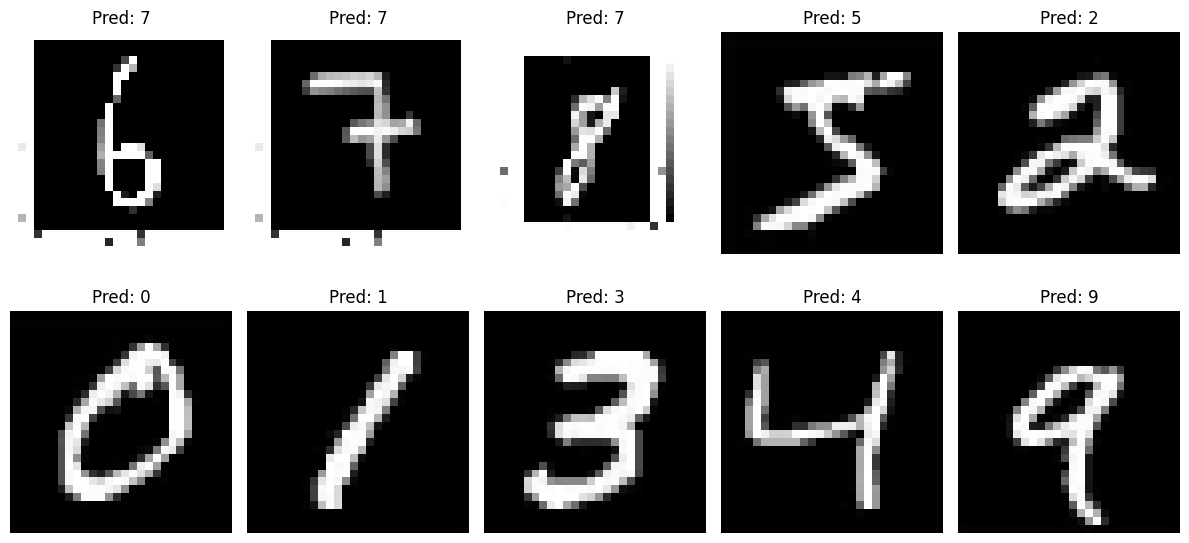

In [44]:
predict_images(model_mnist, image_files, target_size=(28, 28), class_labels=class_labels_mnist)

In [2]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt



In [3]:
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
x_train_cifar10 = x_train_cifar10.reshape(-1, 32*32*3).astype('float32') / 255
x_test_cifar10 = x_test_cifar10.reshape(-1, 32*32*3).astype('float32') / 255

In [5]:
y_train_cifar10 = to_categorical(y_train_cifar10, 10)
y_test_cifar10 = to_categorical(y_test_cifar10, 10)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

def build_ann_model(input_size, num_classes):
    model = Sequential()


    model.add(Dense(512, activation='relu', input_shape=(input_size,)))
    model.add(Dropout(0.5))  # Tránh overfitting


    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))


    model.add(Dense(128, activation='relu'))


    model.add(Dense(num_classes, activation='softmax'))


    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [7]:
model_cifar10 = build_ann_model(32*32*3, 10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history_cifar10 = model_cifar10.fit(x_train_cifar10, y_train_cifar10, epochs=100, batch_size=64, validation_data=(x_test_cifar10, y_test_cifar10))


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.1668 - loss: 2.2287 - val_accuracy: 0.2803 - val_loss: 1.9600
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.2302 - loss: 2.0288 - val_accuracy: 0.2725 - val_loss: 1.9882
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.2471 - loss: 1.9971 - val_accuracy: 0.2677 - val_loss: 2.0048
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.2540 - loss: 1.9753 - val_accuracy: 0.2971 - val_loss: 1.9433
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.2611 - loss: 1.9673 - val_accuracy: 0.2995 - val_loss: 1.9525
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.2681 - loss: 1.9415 - val_accuracy: 0.3188 - val_loss: 1.9288
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.2754 - loss: 1.9372 - val_accuracy: 0.3165 - val_loss: 1.9252
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.2785 - loss: 1

In [15]:
!ls /content/drive/MyDrive/cifar10


airplane4.png	  bird6.png  deer6.png	frog1.png   ship2.png
automobile10.png  cat1.png   dog10.png	horse2.png  truck10.png


In [16]:
from keras.utils import load_img, img_to_array
import numpy as np
import os


image_folder = "/content/drive/MyDrive/cifar10"
image_files = [os.path.join(image_folder, f)
               for f in os.listdir(image_folder)
               if f.endswith(('.jpg', '.png', '.jpeg', '.webp'))]



class_labels_cifar10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [19]:
import matplotlib.pyplot as plt

def predict_images(model, image_files, target_size, class_labels):
    plt.figure(figsize=(12, 6))

    for i, image_path in enumerate(image_files[:10]):  # Chỉ lấy 10 ảnh đầu
        img = load_img(image_path, color_mode="grayscale" if target_size == (28, 28) else "rgb", target_size=target_size)
        img_array = img_to_array(img) / 255.0
        img_flatten = img_array.reshape(1, np.prod(target_size) * (1 if target_size == (28, 28) else 3))

        prediction = model.predict(img_flatten)
        predicted_class = class_labels[np.argmax(prediction)]

        # Hiển thị ảnh và kết quả dự đoán
        plt.subplot(2, 5, i + 1)
        plt.imshow(img_array.squeeze(), cmap='gray' if target_size == (28, 28) else None)
        plt.title(f'Pred: {predicted_class}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


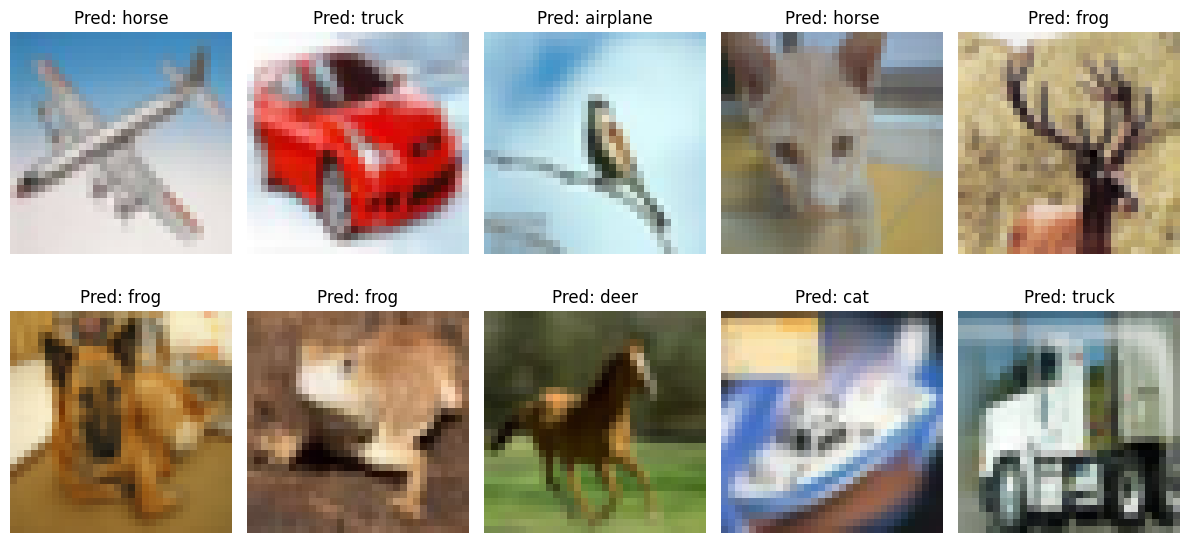

In [20]:
predict_images(model_cifar10, image_files, target_size=(32, 32), class_labels=class_labels_cifar10)

In [21]:
model_cifar10.save('/content/drive/MyDrive/cifar10_model.h5')